# LSTM Model for Airlines Passengers

This is a problem where, given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observation
### Dataset
https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

### Install required Modules and Import them

In [4]:
!pip install tensorflow

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [7]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [8]:
# load the dataset
dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

### Data Visualization

In [10]:
df1=pd.read_csv('airline-passengers.csv')
df1

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [12]:
df1['date'] = pd.to_datetime(df1['Month'], errors='coerce')
df1

,Month,Passengers,date
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01
...,...,...,...
139,1960-08,606,1960-08-01
140,1960-09,508,1960-09-01
141,1960-10,461,1960-10-01
142,1960-11,390,1960-11-01


In [13]:
# Extract month and year
df1['year'] = df1['date'].dt.year
df1['month_date'] = df1['date'].dt.month
df1

,Month,Passengers,date,year,month_date
0,1949-01,112,1949-01-01,1949,1
1,1949-02,118,1949-02-01,1949,2
2,1949-03,132,1949-03-01,1949,3
3,1949-04,129,1949-04-01,1949,4
4,1949-05,121,1949-05-01,1949,5
...,...,...,...,...,...
139,1960-08,606,1960-08-01,1960,8
140,1960-09,508,1960-09-01,1960,9
141,1960-10,461,1960-10-01,1960,10
142,1960-11,390,1960-11-01,1960,11


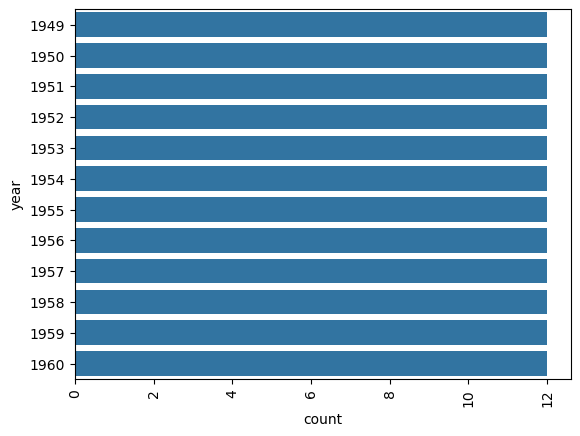

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y=df1['year'])
plt.xticks(rotation=90)
plt.show()

In [15]:
k = df1.groupby('year')['Passengers'].sum().reset_index()
k

,year,Passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


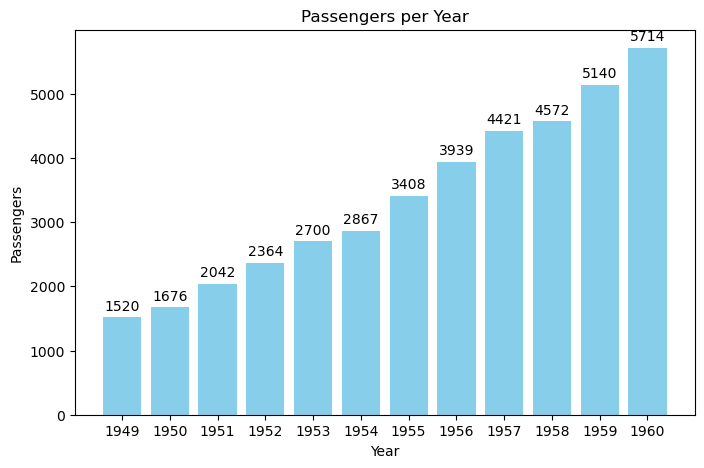

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(k['year'], k['Passengers'], color='skyblue')
# Annotate values on the bars
ax.bar_label(bars, fmt='%d', padding=3)
ax.set_xlabel('Year')
ax.set_ylabel('Passengers')
ax.set_title('Passengers per Year')
plt.xticks(k['year'])  # Ensure proper year labels
plt.show()

In [17]:
k1 = df1.groupby('month_date')['Passengers'].sum().reset_index()
k1

,month_date,Passengers
0,1,2901
1,2,2820
2,3,3242
3,4,3205
4,5,3262
5,6,3740
6,7,4216
7,8,4213
8,9,3629
9,10,3199


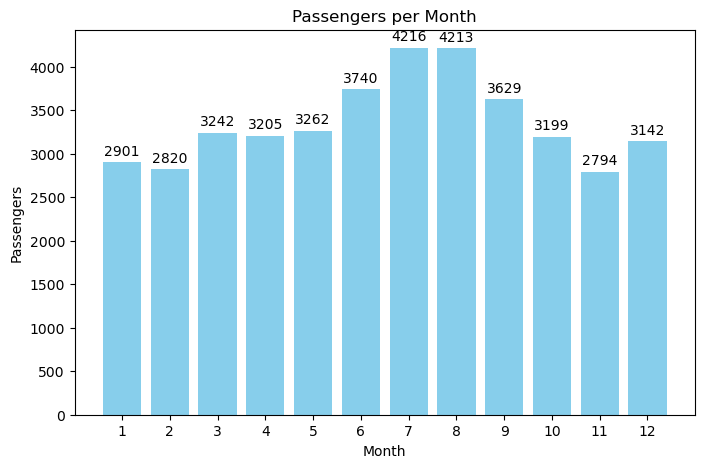

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(k1['month_date'], k1['Passengers'], color='skyblue')
# Annotate values on the bars
ax.bar_label(bars, fmt='%d', padding=3)
ax.set_xlabel('Month')
ax.set_ylabel('Passengers')
ax.set_title('Passengers per Month')
plt.xticks(k1['month_date'])  # Ensure proper year labels
plt.show()

### Data Normalization

In [20]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [21]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
train,test


(array([[0.01544401],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
        [0.08494207],
        [0.06177607],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123553],
        [0.04247104],
        [0.07142857],
        [0.05984557],
        [0.04054055],
        [0.08687258],
        [0.12741312],
        [0.12741312],
        [0.10424709],
        [0.05598456],
        [0.01930502],
        [0.06949806],
        [0.07915059],
        [0.08880308],
        [0.14285713],
        [0.11389962],
        [0.13127413],
        [0.14285713],
        [0.18339768],
        [0.18339768],
        [0.15444016],
        [0.11196911],
        [0.08108109],
        [0.1196911 ],
        [0.12934363],
        [0.14671814],
        [0.17181468],
        [0.14864865],
        [0.15250966],
        [0.22007722],
        [0.24324325],
        [0.26640925],
        [0.2027027 ],
        [0

In [22]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX,trainY,testX,testY

(array([[0.01544401],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
        [0.08494207],
        [0.06177607],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123553],
        [0.04247104],
        [0.07142857],
        [0.05984557],
        [0.04054055],
        [0.08687258],
        [0.12741312],
        [0.12741312],
        [0.10424709],
        [0.05598456],
        [0.01930502],
        [0.06949806],
        [0.07915059],
        [0.08880308],
        [0.14285713],
        [0.11389962],
        [0.13127413],
        [0.14285713],
        [0.18339768],
        [0.18339768],
        [0.15444016],
        [0.11196911],
        [0.08108109],
        [0.1196911 ],
        [0.12934363],
        [0.14671814],
        [0.17181468],
        [0.14864865],
        [0.15250966],
        [0.22007722],
        [0.24324325],
        [0.26640925],
        [0.2027027 ],
        [0

In [23]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


### Model Development

In [25]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


C:\Users\durge\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
94/94 - 3s - 30ms/step - loss: 0.0315
Epoch 2/100
94/94 - 0s - 3ms/step - loss: 0.0148
Epoch 3/100
94/94 - 0s - 3ms/step - loss: 0.0112
Epoch 4/100
94/94 - 0s - 2ms/step - loss: 0.0101
Epoch 5/100
94/94 - 0s - 3ms/step - loss: 0.0092
Epoch 6/100
94/94 - 0s - 3ms/step - loss: 0.0083
Epoch 7/100
94/94 - 0s - 3ms/step - loss: 0.0074
Epoch 8/100
94/94 - 0s - 3ms/step - loss: 0.0065
Epoch 9/100
94/94 - 0s - 4ms/step - loss: 0.0056
Epoch 10/100
94/94 - 0s - 4ms/step - loss: 0.0047
Epoch 11/100
94/94 - 0s - 2ms/step - loss: 0.0040
Epoch 12/100
94/94 - 0s - 3ms/step - loss: 0.0034
Epoch 13/100
94/94 - 0s - 3ms/step - loss: 0.0029
Epoch 14/100
94/94 - 0s - 3ms/step - loss: 0.0026
Epoch 15/100
94/94 - 0s - 3ms/step - loss: 0.0024
Epoch 16/100
94/94 - 0s - 3ms/step - loss: 0.0022
Epoch 17/100
94/94 - 0s - 3ms/step - loss: 0.0021
Epoch 18/100
94/94 - 0s - 3ms/step - loss: 0.0021
Epoch 19/100
94/94 - 0s - 2ms/step - loss: 0.0021
Epoch 20/100
94/94 - 0s - 2ms/step - loss: 0.0020
Epoch 21

In [26]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [27]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 22.75 RMSE
Test Score: 50.19 RMSE


In [28]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [29]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Prediction Visualization

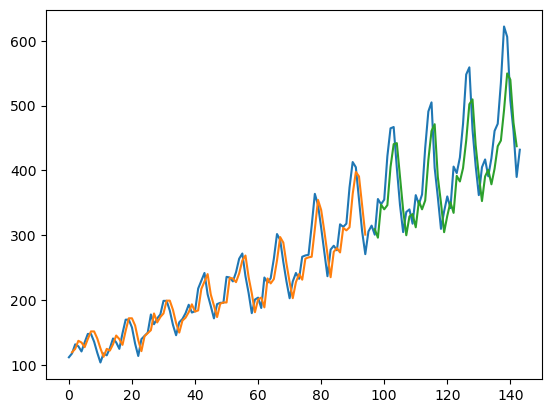

In [31]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

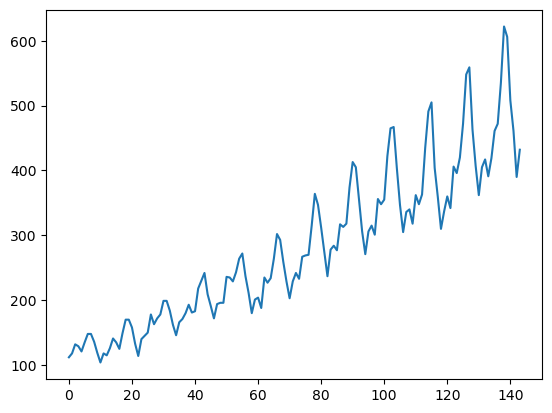

In [32]:
plt.plot(scaler.inverse_transform(dataset))

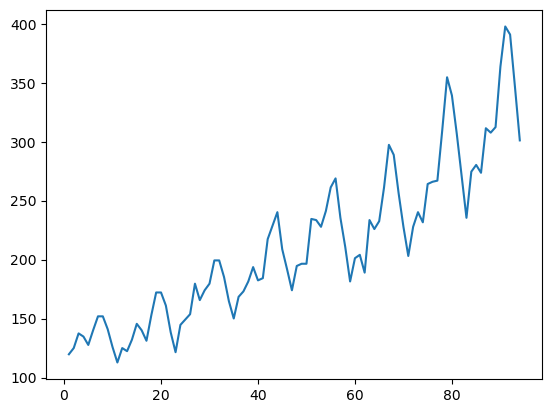

In [33]:
plt.plot(trainPredictPlot)

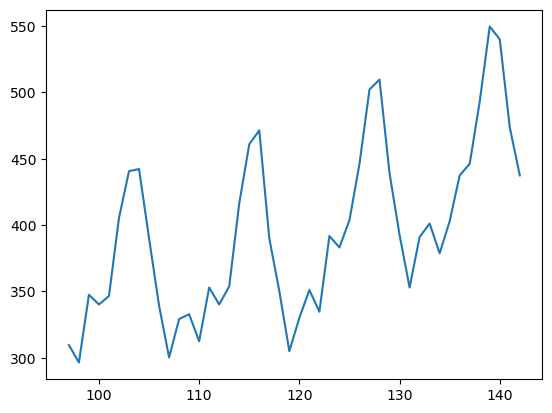

In [34]:
plt.plot(testPredictPlot)

### Output Prediction

In [74]:
# Make sure the look_back value is the same as used during training (e.g., 12)
look_back = 12  # Adjust to match the training setup
print(dataset)
# Take the last `look_back` number of data points for prediction
last_value = dataset[-look_back:]  # Take the last `look_back` months of data
print(last_value)
last_value = np.reshape(last_value, (1, look_back, 1))  # Reshape for prediction

# Predict the next value (next month)
next_month_pred = model.predict(last_value)

# Inverse transform the predicted value
next_month_pred = scaler.inverse_transform(next_month_pred)

print("Predicted number of passengers for the next month:", next_month_pred[0][0])


[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123553]
 [0.04247104]
 [0.07142857]
 [0.05984557]
 [0.04054055]
 [0.08687258]
 [0.12741312]
 [0.12741312]
 [0.10424709]
 [0.05598456]
 [0.01930502]
 [0.06949806]
 [0.07915059]
 [0.08880308]
 [0.14285713]
 [0.11389962]
 [0.13127413]
 [0.14285713]
 [0.18339768]
 [0.18339768]
 [0.15444016]
 [0.11196911]
 [0.08108109]
 [0.1196911 ]
 [0.12934363]
 [0.14671814]
 [0.17181468]
 [0.14864865]
 [0.15250966]
 [0.22007722]
 [0.24324325]
 [0.26640925]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374519]
 [0.17760617]
 [0.17760617]
 [0.25482625]
 [0.25289574]
 [0.24131274]
 [0.26833975]
 [0.3088803 ]
 [0.32432434]
 [0.25675675]
 [0.20656371]
 [0.14671814]
 [0.18725869]
 [0.19305018]
 [0.16216215]
 [0.25289574]
 [0.23745173]
 [0.25096524]
 [0.3088803 ]
 [0.38223937]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.1911197 ]
 [0.24

In [78]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Extract the last date in the dataset (assuming the dataset has a 'Date' column or using an index)
# We assume the dataset corresponds to monthly data starting from a known month.
# If the dataset is simple, you can use this approach to simulate dates.

# Let's assume the data starts from '1949-01' and increments monthly.
# You can adjust the start date if your dataset has a different starting point.

start_date = '1949-01'  # Adjust this to the start of your dataset
dates = pd.date_range(start=start_date, periods=len(dataset), freq='ME')

# Get the last date in the dataset
last_date = dates[-1]

# Print the last date, and increment to get the next month's prediction
next_month_date = last_date + pd.DateOffset(months=1)

# Print the next month's date, month, and year
print(f"Predicted Date: {next_month_date.strftime('%Y-%m-%d')}")
print(f"Month: {next_month_date.month}")
print(f"Year: {next_month_date.year}")


Predicted Date: 1961-01-31
Month: 1
Year: 1961
